In [15]:
# K-Means MachineLearning model and classify the employees into various groups or clusters.
# grouping the salaries with K-Means clustering
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [16]:
# view the dataset
df = pd.read_csv("income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income($)')

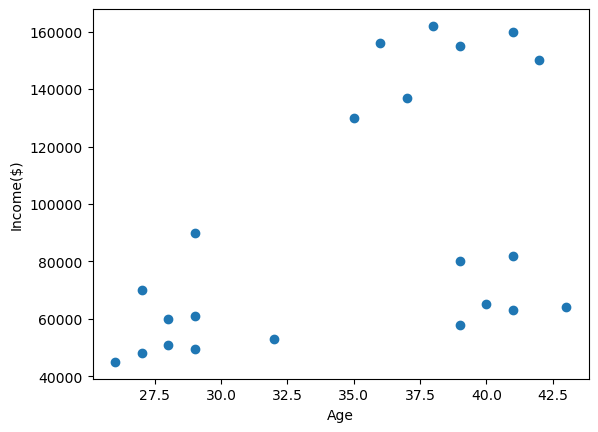

In [17]:
# create scatter plot to see the groups or clusters
plt.scatter (df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)' )

In [20]:
# since 3 clusters are seen, let us use K means clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict (df[['Age', 'Income($)']])
y_predicted

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [21]:
# add this cluster as another column
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [24]:
# find the center coordinates of clusters
print(km.cluster_centers_)

[[3.40000000e+01 8.05000000e+04]
 [3.82857143e+01 1.50000000e+05]
 [3.29090909e+01 5.61363636e+04]]


In [25]:
# 0th col and lst col represents X, Y coordinates of the cluster centers
X= km.cluster_centers_[:,0] # all rows in Oth column
Y= km.cluster_centers_[:,1] # al1 rows in 1st column

In [28]:
#Separate the 3 clusters into 3 dataframes
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


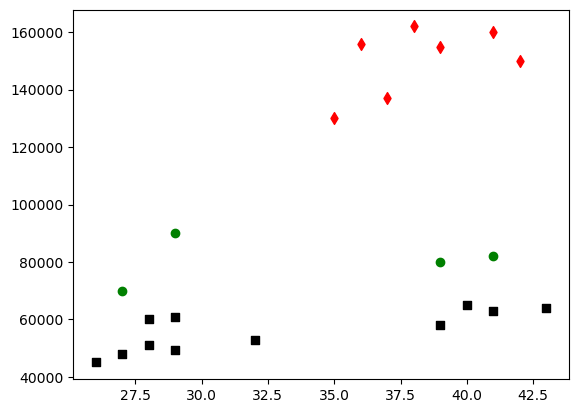

In [33]:
# scatter plot the clusters
plt.scatter (df1.Age,df1['Income($)'],color='green', marker='o')
plt.scatter (df2.Age, df2['Income($)'],color='red', marker='d')
plt.scatter(df3.Age, df3['Income($)'],color="black", marker='s')

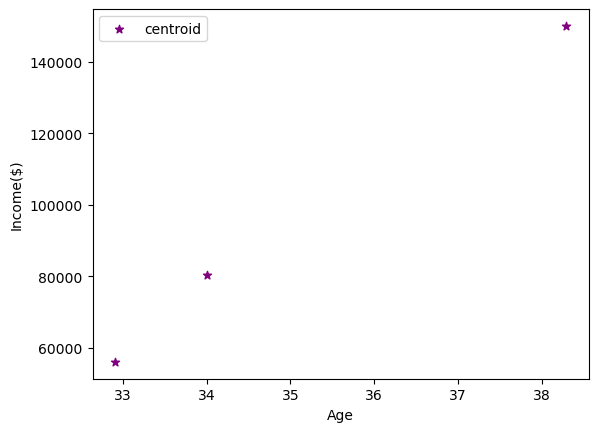

In [34]:
# scatter plot the cluster centers
plt.scatter (X, Y, color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend ()

In [35]:
# the clusters are not grouped correctly.
# The reason is scaling of data is not done.
# MinMaxScaler can be used for proper scaling of data
scaler = MinMaxScaler()
# fit the scale to income
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
# fit the scale to Age
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [36]:
# dispaly data frame after scaling
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [39]:
# elbow plot to find correct value of K
# calculate SSE values for each K value from 1 to 9
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans (n_clusters=k)
    km.fit(df[['Age','Income($)']] )
    sse.append (km.inertia_) # inertia = Sum of squared distances

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\A

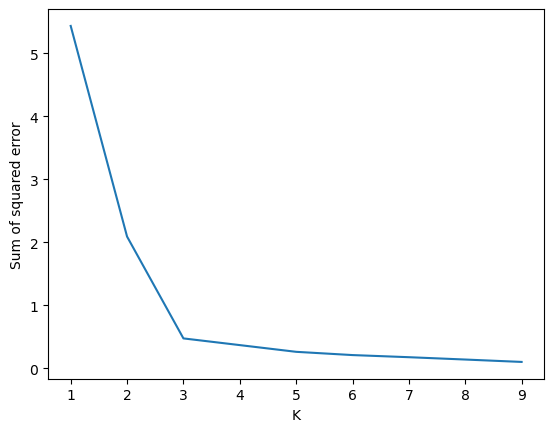

In [40]:
# draw the plot between K and sSE values
plt.xlabel ('K')
plt.ylabel('Sum of squared error')
plt.plot (k_rng, sse)
plt.show()

# the plot shows that there are 3 income groups.